In [9]:
# Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
# Reading the training data
data_train = pd.read_csv('ex3_train.csv', sep=",", encoding='utf-8', header='infer')
df_train = data_train

y_train = df_train['y']
X_train = df_train.drop(['y'], axis=1)
# Adding one's column for bias
# X_train.insert(0,-1,1) 

print(X_train.shape)
print(y_train.shape)


(3500, 400)
(3500,)


7    0
Name: y, dtype: int64


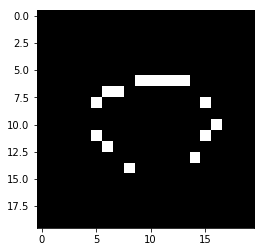

In [44]:
# Reading the test data
data_test = pd.read_csv('ex3_test.csv', sep=",", encoding='utf-8', header='infer')
df_test = data_test

y_test = df_test['y']
X_test = df_test.drop(['y'], axis=1)

#Plot the selected pixel
num = 7
pixels = np.array(X_test[num:num+1], dtype='uint8')
print(y_test[num:num+1])
pixels = pixels.reshape((20, 20))
plt.imshow(pixels, cmap='gray')
plt.show()


# Adding one's column for bias
# X_test.insert(0,-1,1) 



In [46]:
# Defining Hyperparameters
inputLayerSize = X_train.shape[1]
hiddenLayerSize = 25 # As specified in assignment requirements
outputLayerSize = y_train_mat.shape[1]

In [63]:
# One hot Encoding the categorical output values to binary by adding 1's for that index and 0's otherwise
def oneHotEncode(y):
    enc = pd.get_dummies(y)
    return np.matrix(enc)

y_train_mat = oneHotEncode(y_train)
print(y_train_mat.shape)


# Applying Sigmoid Activation function to the hidden layer outputs, works with scalar, arrays and matrix as well
# Purpose of this method is to do squishing on the linear function
def apply_sigmoid(z):
    return 1/(1+np.exp(-z))


# Forward propagation to calculate yHat by applying activation function twice
def forward_propagate(X, W1):
    z2 = np.dot(X, W1)
    print('z2 shape---')
    print(z2.shape)
    a2 = apply_sigmoid(z2)
    print('a2 shape---')
    print(a2.shape)
    print(z2)
    W2 = 0.01* np.random.randn(hiddenLayerSize,outputLayerSize);
#     W2_bias = np.c_[np.ones((W2.shape[0], 1)), W2] # Add column for bias
    z3 = np.dot(a2, W2)
    yHat = apply_sigmoid(z3) # Output of the last layer(output layer)
    return yHat

(3500, 10)


In [65]:
print(inputLayerSize)
print(outputLayerSize)
print(hiddenLayerSize)

# Call Forward propagation to calculate yHat
W1 = 0.01* np.random.randn(inputLayerSize,hiddenLayerSize);
# W1_bias = np.c_[np.ones((W1.shape[0], 1)), W1] # Add column for bias

print(W1.shape);
print(W1_bias.shape);
print(W1);
print(W1_bias);
y_train_Hat = forward_propagate(X_train, W1)
print(y_train_Hat)
print(y_train_Hat.shape)

400
10
25
(400, 25)
(401, 26)
[[-0.00260622 -0.01250191 -0.00178242 ...,  0.00632297 -0.00968918
   0.00617907]
 [ 0.00936864 -0.00170305  0.00631742 ...,  0.00582405 -0.00108779
   0.01443415]
 [ 0.01369773 -0.0054706   0.00050398 ...,  0.0081098  -0.00049111
  -0.00166223]
 ..., 
 [ 0.00200798  0.00364304 -0.01407197 ...,  0.00351922 -0.01501257
  -0.00030978]
 [ 0.00142657  0.00471447 -0.00940441 ..., -0.0037205   0.00363001
  -0.00739288]
 [ 0.00607796  0.00633714  0.00295091 ...,  0.00779166  0.00590219
   0.00463926]]
[[  1.00000000e+00  -8.83746902e-03  -6.77017123e-03 ...,  -6.41417353e-03
   -1.28484599e-02  -1.05394168e-02]
 [  1.00000000e+00   1.83739851e-02   6.03630333e-03 ...,   1.68747849e-02
    3.01187128e-03  -6.39488640e-03]
 [  1.00000000e+00   7.01669824e-03   2.23688794e-05 ...,  -1.61131523e-02
    1.48364547e-02   2.40776779e-03]
 ..., 
 [  1.00000000e+00  -9.08313083e-03  -2.19351685e-03 ...,   1.34693919e-02
   -1.09775967e-02   2.49741339e-03]
 [  1.00000000e